In [1]:
import numpy
from matplotlib import pyplot
import ipywidgets

%matplotlib inline

In [2]:
pyplot.rc('font', family ='serif', size = 16)

In [3]:
def rho_red_light(x, rho_max):
    rho = numpy.full_like(x, rho_max) # create array with same shape as array "x" and numerical entries as "rho_max"
    mask = numpy.where((x<3.0))
    rho[mask] = rho_max/2
    return rho

In [15]:
nx = 81
L= 4.0
dx = L /(nx-1)
x = numpy.linspace(0.0, L, num = nx)

rho_max = 10.0
u_max = 1.0

rho0 = rho_red_light(x, rho_max)

In [5]:
def plot ( n, x, rho_hist) :
    pyplot.figure ( figsize = (10, 5))
    pyplot.grid()
    pyplot.title('Time step: {}'.format(n))
    pyplot.plot(x, rho_hist[n])
    pyplot.xlabel ( '$Road [km] $') ;  pyplot.ylabel ( ' Traffic density [cars/hr]') ; 
    pyplot.xlim (x[0], x[-1] ); pyplot.ylim (4.0, 11.0) ; 
    pyplot.show()

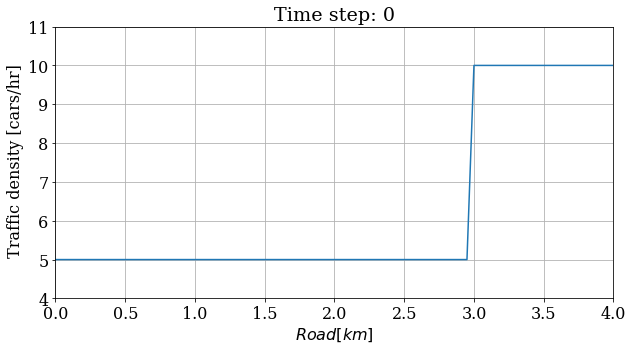

In [6]:
plot(0,x,[rho0])

In [7]:
def traffic_speed(rho, u_max, rho_max):
    return u_max * (1 - rho / rho_max)

def traffic_flux (rho, u_max, rho_max):
    return rho * traffic_speed(rho, u_max, rho_max)

In [8]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value = 0, min=0, max = nt, step=1, description = 'Time step')
    w = ipywidgets.interactive(plot, n = nt_slider, x=ipywidgets.fixed(x), rho_hist = ipywidgets.fixed(rho_hist))
    return w

In [9]:
interactive_plot(x,[rho0])

interactive(children=(IntSlider(value=0, description='Time step', max=0), Output()), _dom_classes=('widget-int…

In [16]:
# Lax-Friedrichs

def lax_friedrichs(rho0, nt, sigma, dx, u_max, rho_max):
    # Initialize rho_hist
    rho_hist = [rho0.copy()]
    dt = sigma*dx/u_max
    rho = rho0.copy()

    for i in range(nt):
        rho[1:-1] = 0.5 * ( rho[2:] + rho[:-2]) - (dt/(2*dx) )* ( traffic_flux (rho[2:], u_max, rho_max) - traffic_flux (rho[:-2], u_max, rho_max) )
        rho_hist.append(rho.copy())
    return rho_hist

In [17]:
sigma =.5
nt = 80
rho_hist = lax_friedrichs(rho0, nt, sigma, dx, u_max, rho_max)

interactive_plot(x, rho_hist)

# SOmething is wrong with my CODE

interactive(children=(IntSlider(value=0, description='Time step', max=80), Output()), _dom_classes=('widget-in…

In [ ]:
def traffic_jacobian(rho, u_max, rho_max):
    J = u_max * (1-2*rho /rho_max)
    return J

def lax_wendroff(rho0, nt, dt, dx, u_max, rho_max):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = traffic_flux(rho, u_max, rho_max)
        J = traffic_jacobian(rho, u_max, rho_max)
        rho[1:-1] = (rho[1:-1] - dt* (F[2:]-F[:-1])/(2*dx)
    return rho_hist

Implement McCormack scheme and modify with different number of time steps

Do challenge section at the end of numerical mooc 